## Project 3

## Distribution of EV Charging Stations in NYC

**Prompt**

- **Dataset(s) to be used:** [https://data.cityofnewyork.us/City-Government/NYC-EV-Fleet-Station-Network/fc53-9hrv/about_data ]
- **Analysis question:** [This analysis explores the geographic distribution of EV charging stations across the five boroughs of New York City. We'll investigate whether there are disparities in charging infrastructure, which could highlight areas for improvement in resource allocation.]
- **Columns that will (likely) be used:**
  - [BOROUGH] Specifies the NYC borough where the station is located.
  - [TYPE OF CHARGER] Describes the type of charger at the station.
  - [LATITUDE] Latitude coordinate for the station's location.
  - [LONGITUDE] Longitude coordinate for the station's location
- **Hypothesis**: [The number and type of EV charging stations (standard vs. fast-charging, solar-powered vs. grid-powered) are unevenly distributed across the five NYC boroughs, potentially reflecting differences in fleet vehicle usage, area size, commercial development or administrative priorities. The more commercially developed Manhattan has more EV charging stations than others.]
- **Site URL:** https://lizlll-project-3.readthedocs.io/en/latest/project3.html

### Introduction

Electric vehicle (EV) infrastructure is critical to supporting NYC's growing fleet of electric and plug-in hybrid vehicles. In this project, we examine data provided by the New York City Department of Citywide Administrative Services (DCAS), focusing on the distribution of EV charging stations in NYC.  

DCAS is rapidly expanding its base of electric chargers to support its electric and plug-in hybrid vehicles. They have installed over 1,600 charging ports across over 1,025 charging stations, including over 180 fast-charging stations, at City garages and parking locations around the city. 

This analysis explores the geographic distribution of EV charging stations across the five boroughs of New York City. We'll investigate whether there are disparities in charging infrastructure, which could highlight areas for improvement in resource allocation.

**The Hypothesis**:  
The number and type of EV charging stations (standard vs. fast-charging, solar-powered vs. grid-powered) are **unevenly distributed** across the five NYC boroughs, potentially reflecting differences in fleet vehicle usage, area size, commercial development or administrative priorities. Does the more commercially developed Manhattan have more EV charging stations than others? 


### About the Data

This dataset was last updated by the DCAS on November 12, 2024. It includes 1410 rows and 18 columns; each row represents a charging station. Station information, geographic details, boroughs, and charger types are some of the key features of the dataset. For our analysis, we focus on the following columns:  

- BOROUGH: Specifies the NYC borough where the station is located.
- TYPE OF CHARGER: Describes the type of charger at the station (e.g., Level 2 Charger, Level 3 Fast Charger, Solar-powered).
- LATITUDE: Latitude coordinate for the station's location.
- LONGITUDE: Longitude coordinate for the station's location.

These columns will help us understand the geographic distribution of different types of chargers at stations and evaluate differences across boroughs. They enable us to create visualizations like bar charts and geospatial maps to uncover patterns and disparities in EV charging infrastructure across NYC for testing our hypothesis. 

**Note** : *In this analysis, "charging stations" refers to the stations with different types of chargers, which essentially is delegated by the column "TYPE OF CHARGER".*

More specific data info can be found here: 
https://data.cityofnewyork.us/City-Government/NYC-EV-Fleet-Station-Network/fc53-9hrv/about_data

### Step 1: Load and Inspect the Data 

In [3]:
import pandas as pd 
import plotly.express as px 
import plotly.io as pio 

pio.renderers.default = 'vscode+jupyterlab+notebook_connected'

# Load the data and preview the dataset to understand its structure
ev_charging = pd.read_csv("NYC_EV_Fleet_Station_Network_2024.csv")

ev_charging.head()

# Check for missing values in the dataset
missing_values = ev_charging.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 AGENCY                                          0
STATION NAME                                    0
TYPE OF CHARGER                                 0
NO. OF PLUGS                                    0
ADDRESS                                        11
CITY                                           11
POSTCODE                                       11
BOROUGH                                        11
PUBLIC CHARGER?                              1337
FEE FOR CITY DRIVERS                         1339
LATITUDE                                      287
LONGITUDE                                     287
COMMUNITY DISTRICT                            287
COUNCIL DISTRICT                              287
CENSUS TRACT 2020                             287
BIN                                           365
BBL                                           365
NEIGHBORHOOD TABULATION AREA (NTA) (2020)     287
dtype: int64


### Step 2: Data Cleaning and Filtering

We want to ensure that the data is consistent, such as checking for typos in borough names. We'll also filter for the "Borough", "Type of Charger", "Latitude" and "Longitude" columns to focus our analysis.

In [4]:
# Inspect unique values in the "BOROUGH" column
unique_boroughs = ev_charging['BOROUGH'].unique()
print("Unique Borough Values:", unique_boroughs)

Unique Borough Values: ['Brooklyn' 'Staten Island' 'Manhattan' 'Queens' 'Bronx' 'Upstate' nan]


In [5]:
# Inspect unique values in the "TYPE OF CHARGER" column
charger_types = ev_charging['TYPE OF CHARGER'].unique()
print("Type of chargers:", charger_types)

Type of chargers: ['Level 3 Fast Charger' 'Level 2 Charger' 'EV Solar Arc Charger'
 'Level 3 Fast Charger - Boost' 'EV Solar Canopy Charger' 'Mobile Charger'
 'L2 DOT Flo Curbside Charger' 'DOT Municipal Level 2 Charger'
 'DOT Municipal Level 3 Charger']


In [6]:
# Filter for the columns we are focusing on

columns = ['BOROUGH', 'TYPE OF CHARGER', 'LATITUDE', 'LONGITUDE']
ev_charging = ev_charging[columns]

# Preview the cleaned dataset
ev_charging.head()

,BOROUGH,TYPE OF CHARGER,LATITUDE,LONGITUDE
0,Brooklyn,Level 3 Fast Charger,40.668034,-73.869949
1,Brooklyn,Level 3 Fast Charger,40.668034,-73.869949
2,Brooklyn,Level 2 Charger,40.668034,-73.869949
3,Staten Island,Level 2 Charger,40.640708,-74.077697
4,Manhattan,Level 2 Charger,40.712806,-74.006096


### Step 3: Group and Aggregate the Data 

To understand the distribution of types of chargers(charging stations) across boroughs, we are going to group the data by "Borough" and "Type of Chargers" and count the number of chargers for each type ("Level 3 Fast Charger", "Level 2 Charger", "EV Solar Arc Charger", "Level 3 Fast Charger - Boost", "EV Solar Canopy Charger", "Mobile Charger", "L2 DOT Flo Curbside Charger","DOT Municipal Level 2 Charger", "DOT Municipal Level 3 Charger"].  

In [7]:
# Group data by BOROUGH and TYPE OF CHARGER 
charger_counts = ev_charging.groupby(['BOROUGH', 'TYPE OF CHARGER']).size()

# Convert the grouped data to a DataFrame
charger_counts = charger_counts.reset_index(name='Count')

# Preview the grouped data
charger_counts.head()

,BOROUGH,TYPE OF CHARGER,Count
0,Bronx,DOT Municipal Level 2 Charger,1
1,Bronx,EV Solar Arc Charger,27
2,Bronx,EV Solar Canopy Charger,6
3,Bronx,L2 DOT Flo Curbside Charger,4
4,Bronx,Level 2 Charger,118


In [8]:
# Create a dataset for total chargers by borough, not specifying charger type
total_chargers_by_borough = ev_charging.groupby('BOROUGH').size().reset_index(name='TOTAL_CHARGERS')
total_chargers_by_borough

,BOROUGH,TOTAL_CHARGERS
0,Bronx,179
1,Brooklyn,292
2,Manhattan,301
3,Queens,447
4,Staten Island,123
5,Upstate,57


### Step 4: Visualizing Borough-Level Distribution of Chargers 

To visualize the number of chargers in each borough, categorized by charger type and not, we are going to create two bar charts. 

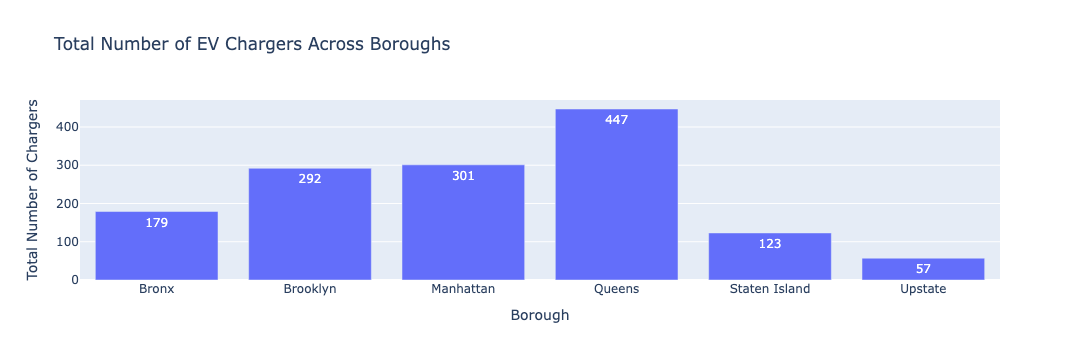

In [9]:
# Create a bar chart displaying the number of chargers in each borough
fig_total = px.bar(
    total_chargers_by_borough,
    x='BOROUGH',
    y='TOTAL_CHARGERS',
    title='Total Number of EV Chargers Across Boroughs',
    labels={'TOTAL_CHARGERS': 'Total Chargers', 'BOROUGH': 'NYC Borough'},
    text='TOTAL_CHARGERS'
)

# Customize the chart layout for better readability
fig_total.update_layout(
    xaxis_title='Borough',
    yaxis_title='Total Number of Chargers',
    uniformtext_minsize=10,
    uniformtext_mode='hide'
)

fig_total.show()

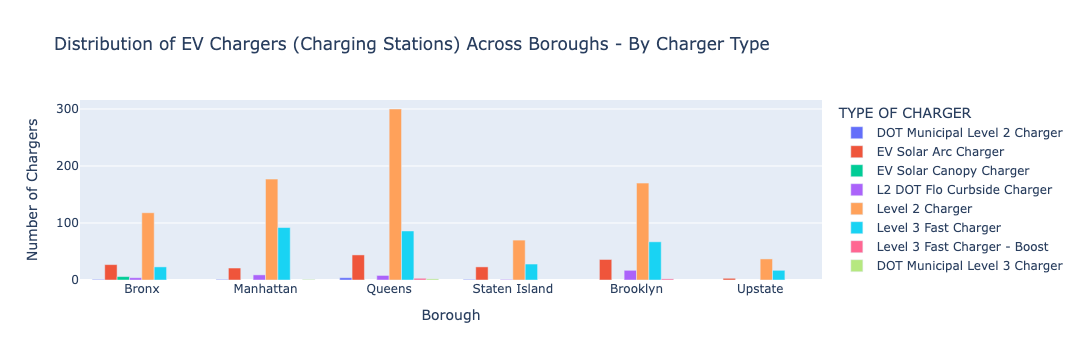

In [10]:
# Create a bar chart displaying the number of chargers in each borough, categorized by charger type
fig = px.bar(
    charger_counts,
    x='BOROUGH',
    y='Count',
    color='TYPE OF CHARGER',
    title='Distribution of EV Chargers (Charging Stations) Across Boroughs - By Charger Type',
    labels={'Count': 'Number of Chargers', 'BOROUGH': 'NYC Borough'},
    barmode='group'
)

# Customize axis labels
fig.update_layout(xaxis_title='Borough', yaxis_title='Number of Chargers')

fig.show()

### Step 5: Data Processing for Geospatial Visualization 

To see more clearly the exact geographic locations of all charging stations across NYC boroughs and understand better the potential underlying mechanism of allocating the chargers across the city, we are going to create a scatter map that is interactive and can help in identifying density and spatial patterns of the charger distribution in NYC. 

In [11]:
# Check for any missing latitude or longitude values
missing_geo = ev_charging[ev_charging[['LATITUDE','LONGITUDE']].isnull().any(axis=1)]
print("Missing geographic coordinates:\n", missing_geo)

Missing geographic coordinates:
         BOROUGH              TYPE OF CHARGER  LATITUDE  LONGITUDE
19       Queens         Level 3 Fast Charger       NaN        NaN
20       Queens         Level 3 Fast Charger       NaN        NaN
21       Queens         Level 3 Fast Charger       NaN        NaN
40       Queens              Level 2 Charger       NaN        NaN
48     Brooklyn         Level 3 Fast Charger       NaN        NaN
...         ...                          ...       ...        ...
1395   Brooklyn  L2 DOT Flo Curbside Charger       NaN        NaN
1396   Brooklyn  L2 DOT Flo Curbside Charger       NaN        NaN
1397  Manhattan  L2 DOT Flo Curbside Charger       NaN        NaN
1398  Manhattan  L2 DOT Flo Curbside Charger       NaN        NaN
1399  Manhattan  L2 DOT Flo Curbside Charger       NaN        NaN

[287 rows x 4 columns]


In [12]:
# Drop rows with missing geographic data
ev_charging = ev_charging.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [13]:
# Verify no geographic data is missing
assert ev_charging[['LATITUDE', 'LONGITUDE']].isnull().sum().sum() == 0

### Step 6: Visualizing the Geographic Distribution of Chargers

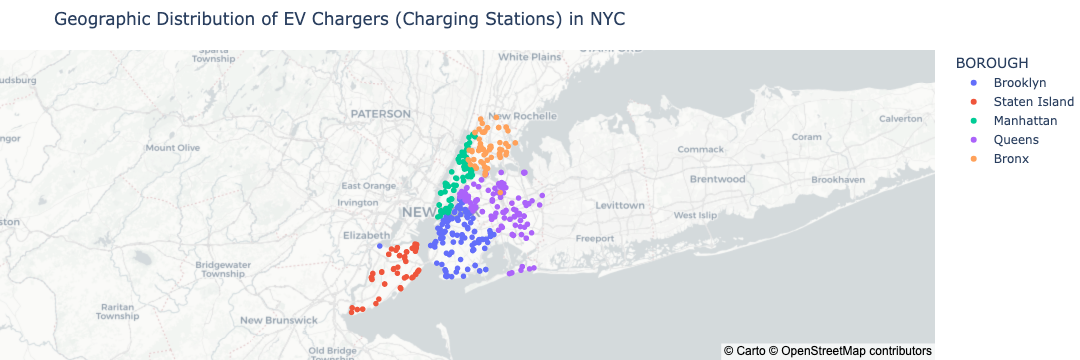

In [14]:
# Create the scatter map 
fig_map = px.scatter_mapbox(
    ev_charging,
    lat='LATITUDE',
    lon='LONGITUDE',
    color='BOROUGH',
    mapbox_style='carto-positron',
    title='Geographic Distribution of EV Chargers (Charging Stations) in NYC',
    hover_name='TYPE OF CHARGER'
)

# Adjust map layout for better visualization 
fig_map.update_layout(margin={"r":0, "t":50, "l":0, "b":0})

fig_map.show()

### Summary

**Observations**  
1)Total Number of EV Charges by Borough:
- Queens has the highest number of EV chargers (371), followed by Brooklyn (261) and Manhattan (238). Bronx and Staten Island have significantly fewer chargers, with 140 and 113 stations, respectively.
- This indicates that Queens, likely due to its large area and diverse facilities, has invested significantly in EV infrastructure.

2)Distribution by Charger Type:
- Queens dominates across most charger types, including Level 2 Chargers, which are the most common type of EV chargers citywide.
- Manhattan has the highest proportion of Level 3 Fast Chargers, likely reflecting its need for quick-charging infrastructure due to high vehicle density and commercial activity.
- Solar-powered chargers are also present in Queens, Brooklyn, and Bronx, showing signs of a city-wide push for renewable energy adoption.

3)Geographic Spread of EV Charges:
- The scatter map shows a dense clustering of chargers in Manhattan, concentrated in central and high-traffic areas, aligning with its commercial focus.
- Queens has a widespread distribution, with stations covering a variety of residential, industrial, and commercial zones.
Bronx and Staten Island exhibit sparser networks, indicating potential areas for further development.


**Key Takeaways**  
Our hypothesis posited that the number and type of EV charging stations are unevenly distributed across the five NYC boroughs, potentially influenced by differences in fleet vehicle usage, area size, commercial development, or administrative priorities. We also suspected that the more commercially developed Manhattan could have more chargers(charging stations) than other boroughs. 

The data analysis we have conducted partially supports our hypothesis as it confirms significant disparities (uneven distribution), with Queens having the highest number of EV chargers overall (371), likely due to its large geographic size and diverse facilities. However, Manhattan, the borough most associated with commercial development, has fewer total chargers (238) than we expected. In the meantime, it's insightful to see that Manhattan leads in the proportion of advanced infrastructure, such as Level 3 Fast Chargers, which cater to high-density, fast-paced environments. This reflects administrative priorities aligning with Manhattan’s commercial and traffic demands. In contrast, Bronx and Staten Island, with fewer chargers overall and sparse networks of advanced chargers, are likely underserved areas, reflecting either lower current demand or less strategic investment. These findings suggest that while Manhattan’s commercial focus drives the deployment of advanced infrastructure, boroughs like Queens demonstrate the importance of area size and diverse usage contexts in determining the total number of chargers, ultimately supporting our hypothesis in a nuanced way.